In [44]:
import pandas as pd 
import numpy as np 
from tqdm import tqdm
import math
import gc
from sklearn.model_selection import KFold
import seaborn as sns

In [2]:
train=pd.read_csv("./data/Train.csv")
test=pd.read_csv("./data/Test.csv")
sample_sub=pd.read_csv("./data/sample_sub.csv")

In [3]:
train.head()

,ID,location,temp,precip,rel_humidity,wind_dir,wind_spd,atmos_press,target
0,ID_train_0,C,"nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...",45.126304
1,ID_train_1,D,"22.53333333,21.71666667,20.83333333,20.9833333...","0.102,0.0,0.0,0.0,0.0,0.0,0.0,0.034,0.017,0.01...","0.744583333,0.808083333,0.911166667,0.91633333...","281.6643101,89.15629262,81.96853891,291.018632...","2.3775,1.126666667,0.700833333,0.3416666670000...","90.32,90.3775,90.44083333,90.4725,90.45416667,...",79.131702
2,ID_train_10,A,"28.975,27.95,29.6,26.425,22.09166667,21.775,22...","0.0,0.0,0.0,0.102,0.136,0.0,0.0,2.16,1.276,0.0...","0.573333333,0.597166667,0.5668333329999999,0.6...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","88.55166667,88.46416667,88.31916667,88.24,88.2...",32.661304
3,ID_train_100,A,"22.96666667,24.26666667,25.275,25.625,25.86666...","0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.77,3.012,1.0...","0.8430833329999999,0.79025,0.7375,0.728,0.7049...","300.0850574,293.6769595,294.5174647,301.921416...","1.446666667,1.1925,1.324166667,1.5441666669999...","88.615,88.53083333,88.4,88.27166667,88.2075,88...",53.850238
4,ID_train_1000,A,"21.875,21.575,21.525,21.43333333,20.50833333,1...","0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0....","0.8564166670000001,0.874916667,0.879833333,0.8...","21.83997432,17.05405341,89.26406044,123.585424...","0.1975,0.244166667,0.411666667,0.56,0.5775,0.4...","88.55666667,88.64083333,88.65833333,88.6475,88...",177.418750


In [4]:
test.head()

,ID,location,temp,precip,rel_humidity,wind_dir,wind_spd,atmos_press
0,ID_test_0,C,"23.96666667,22.88333333,22.28333333,21.4833333...","0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0....","0.6898333329999999,0.722333333,0.7755833329999...","290.1352379,328.47011289999995,323.5730796,282...","0.6333333329999999,0.725,0.955,0.8725,0.6925,0...","87.64333333,87.67,87.70583333,87.75083333,87.7..."
1,ID_test_1,C,"18.99166667,19.70833333,20.95833333,22.7833333...","0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0....","0.99975,0.99725,0.956333333,0.851583333,0.7775...","295.2350543,307.6569135,313.7360236,311.518385...","0.640833333,1.244166667,1.284166667,1.2875,1.3...","87.8925,87.95666667,87.9925,87.9925,87.9808333..."
2,ID_test_10,D,"25.11666667,25.08333333,24.40833333,23.575,22....","0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0....","0.760166667,0.733583333,0.78475,0.825833333,0....","77.06161145,95.48124997,61.44498258,89.4688360...","2.0133333330000003,1.3025,0.783333333,0.530833...","90.34,90.2975,90.305,90.35583333,90.4425,90.49..."
3,ID_test_100,C,"18.71666667,20.60833333,22.28333333,23.9833333...","0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.604,0.0,0.0,...","0.951416667,0.92575,0.8603333329999999,0.77883...","310.7509058,316.186793,324.8167326,327.2174992...","0.745,1.169166667,1.316666667,1.385,1.40083333...","87.98833333,88.06333333,88.07833333,88.0366666..."
4,ID_test_1000,D,"17.63333333,18.05833333,19.625,21.28333333,23....","0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0....","0.9,0.898333333,0.8725,0.831666667,0.820833332...","334.6054069,329.6848561000001,322.7668036,312....","0.620833333,0.5,0.456666667,0.558333333,1.0158...","90.515,90.5575,90.62333333,90.6825,90.67916667..."


In [5]:
# covert features  from string to List of values 
def replace_nan(x):
    if x==" ":
        return np.nan
    else :
        return float(x)
features=["temp","precip","rel_humidity","wind_dir","wind_spd","atmos_press"]
for feature in features : 
    train[feature]=train[feature].apply(lambda x: [ replace_nan(X) for X in x.replace("nan"," ").split(",")])
    test[feature]=test[feature].apply(lambda x: [ replace_nan(X)  for X in x.replace("nan"," ").split(",")])    

### Features engineering part

In [6]:
def aggregate_features(x,col_name):
    x["max_"+col_name]=x[col_name].apply(np.max)
    x["min_"+col_name]=x[col_name].apply(np.min)
    x["mean_"+col_name]=x[col_name].apply(np.mean)
    x["std_"+col_name]=x[col_name].apply(np.std)
    x["var_"+col_name]=x[col_name].apply(np.var)
    x["median_"+col_name]=x[col_name].apply(np.median)
    x["ptp_"+col_name]=x[col_name].apply(np.ptp)
    return x  
def remove_nan_values(x):
    return [e for e in x if not math.isnan(e)]


In [7]:
data=pd.concat([train,test],sort=False).reset_index(drop=True)
data.columns.tolist()

['ID',
 'location',
 'temp',
 'precip',
 'rel_humidity',
 'wind_dir',
 'wind_spd',
 'atmos_press',
 'target']

In [8]:
data.shape

(20574, 9)

In [9]:
for col_name in features:
    data[col_name]=data[col_name].apply(remove_nan_values)

In [10]:
for col_name in features:
    data=aggregate_features(data,col_name)

In [11]:
for x in range(121):
    data["newtemp"+ str(x)] = data.temp.str[x]
    data["newprecip"+ str(x)] = data.precip.str[x]
    data["newrel_humidity"+ str(x)] = data.rel_humidity.str[x]
    data["newwind_dir"+ str(x)] = data.wind_dir.str[x]
    data["windspeed"+ str(x)] = data.wind_spd.str[x]
    data["atmospherepressure"+ str(x)] = data.atmos_press.str[x]

/var/folders/jy/dzvsvxv95gggzwht8xmx88yh0000gn/T/ipykernel_4146/2101151923.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data["newrel_humidity"+ str(x)] = data.rel_humidity.str[x]
/var/folders/jy/dzvsvxv95gggzwht8xmx88yh0000gn/T/ipykernel_4146/2101151923.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data["newwind_dir"+ str(x)] = data.wind_dir.str[x]
/var/folders/jy/dzvsvxv95gggzwht8xmx88yh0000gn/T/ipykernel_4146/2101151923.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of call

In [12]:
data.drop(features,1,inplace=True)

/var/folders/jy/dzvsvxv95gggzwht8xmx88yh0000gn/T/ipykernel_4146/3282650053.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data.drop(features,1,inplace=True)


In [13]:
train=data[data.target.notnull()].reset_index(drop=True)
test=data[data.target.isna()].reset_index(drop=True)

In [14]:
del data  
gc.collect()

102

# EDA

In [38]:
train.head()

,ID,location,target,max_temp,min_temp,mean_temp,std_temp,var_temp,median_temp,ptp_temp,...,newwind_dir119,windspeed119,atmospherepressure119,newtemp120,newprecip120,newrel_humidity120,newwind_dir120,windspeed120,atmospherepressure120,fold
0,ID_train_0,C,45.126304,27.208333,19.275000,22.299527,2.594011,6.728895,21.358333,7.933333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
1,ID_train_1,D,79.131702,33.616667,17.983333,24.679063,4.266955,18.206903,23.791667,15.633333,...,73.528733,1.475833,90.439167,21.450000,0.561,0.797333,296.967254,1.019167,90.529167,0
2,ID_train_10,A,32.661304,31.841667,18.458333,24.112317,3.776377,14.261020,23.304167,13.383333,...,NaN,NaN,88.415833,NaN,NaN,NaN,NaN,NaN,NaN,1
3,ID_train_100,A,53.850238,27.491667,16.941667,20.845273,3.080140,9.487259,19.541667,10.550000,...,NaN,NaN,88.490833,24.641667,0.000,0.719667,NaN,NaN,88.465833,1
4,ID_train_1000,A,177.418750,28.750000,17.525000,21.870732,3.286870,10.803515,20.950000,11.225000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [16]:
train.shape

(15539, 771)

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15539 entries, 0 to 15538
Columns: 771 entries, ID to atmospherepressure120
dtypes: float64(769), object(2)
memory usage: 91.4+ MB


In [34]:
eda = train[train.columns[:45]]

In [39]:
eda.head()

,ID,location,target,max_temp,min_temp,mean_temp,std_temp,var_temp,median_temp,ptp_temp,...,var_wind_spd,median_wind_spd,ptp_wind_spd,max_atmos_press,min_atmos_press,mean_atmos_press,std_atmos_press,var_atmos_press,median_atmos_press,ptp_atmos_press
0,ID_train_0,C,45.126304,27.208333,19.275000,22.299527,2.594011,6.728895,21.358333,7.933333,...,0.155268,0.666250,1.355000,87.871667,87.614167,87.752434,0.070374,0.004952,87.762083,0.257500
1,ID_train_1,D,79.131702,33.616667,17.983333,24.679063,4.266955,18.206903,23.791667,15.633333,...,0.290736,0.744167,2.760833,90.725000,90.056667,90.429924,0.156000,0.024336,90.429167,0.668333
2,ID_train_10,A,32.661304,31.841667,18.458333,24.112317,3.776377,14.261020,23.304167,13.383333,...,0.342484,0.942500,2.420000,88.813333,87.982500,88.420931,0.179481,0.032213,88.425000,0.830833
3,ID_train_100,A,53.850238,27.491667,16.941667,20.845273,3.080140,9.487259,19.541667,10.550000,...,0.336701,1.388333,2.469167,88.685000,87.965000,88.376915,0.161758,0.026166,88.400000,0.720000
4,ID_train_1000,A,177.418750,28.750000,17.525000,21.870732,3.286870,10.803515,20.950000,11.225000,...,0.181690,0.542917,1.796667,88.719167,88.268333,88.538104,0.118369,0.014011,88.552500,0.450833


In [41]:
eda.tail()

,ID,location,target,max_temp,min_temp,mean_temp,std_temp,var_temp,median_temp,ptp_temp,...,var_wind_spd,median_wind_spd,ptp_wind_spd,max_atmos_press,min_atmos_press,mean_atmos_press,std_atmos_press,var_atmos_press,median_atmos_press,ptp_atmos_press
15534,ID_train_9995,A,44.850286,27.841667,16.550000,20.573209,2.987662,8.926124,19.458333,11.291667,...,0.234138,0.890000,2.194167,88.730000,87.890833,88.382934,0.187366,0.035106,88.393333,0.839167
15535,ID_train_9996,E,24.330455,29.550000,18.991667,23.546832,2.614979,6.838117,23.208333,10.558333,...,0.385348,1.094167,2.330833,88.704167,88.082500,88.435840,0.141562,0.020040,88.450000,0.621667
15536,ID_train_9997,D,38.972128,34.108333,16.950000,24.637083,4.352597,18.945097,24.179167,17.158333,...,0.389128,0.897500,3.608333,90.885000,90.145833,90.522397,0.161257,0.026004,90.520000,0.739167
15537,ID_train_9998,D,41.720952,30.900000,15.891667,23.472934,4.651403,21.635547,23.066667,15.008333,...,0.359279,0.828333,2.683333,90.793333,90.106667,90.486202,0.160746,0.025839,90.512500,0.686667
15538,ID_train_9999,C,127.983333,30.450000,19.033333,24.012603,3.215774,10.341200,22.833333,11.416667,...,0.085276,0.569167,1.319167,88.116667,87.562500,87.810847,0.121178,0.014684,87.804167,0.554167


In [36]:
eda.info

<bound method DataFrame.info of                   ID location      target   max_temp   min_temp  mean_temp  \
0         ID_train_0        C   45.126304  27.208333  19.275000  22.299527   
1         ID_train_1        D   79.131702  33.616667  17.983333  24.679063   
2        ID_train_10        A   32.661304  31.841667  18.458333  24.112317   
3       ID_train_100        A   53.850238  27.491667  16.941667  20.845273   
4      ID_train_1000        A  177.418750  28.750000  17.525000  21.870732   
...              ...      ...         ...        ...        ...        ...   
15534  ID_train_9995        A   44.850286  27.841667  16.550000  20.573209   
15535  ID_train_9996        E   24.330455  29.550000  18.991667  23.546832   
15536  ID_train_9997        D   38.972128  34.108333  16.950000  24.637083   
15537  ID_train_9998        D   41.720952  30.900000  15.891667  23.472934   
15538  ID_train_9999        C  127.983333  30.450000  19.033333  24.012603   

       std_temp   var_temp  med

In [49]:
eda.columns

Index(['ID', 'location', 'target', 'max_temp', 'min_temp', 'mean_temp',
       'std_temp', 'var_temp', 'median_temp', 'ptp_temp', 'max_precip',
       'min_precip', 'mean_precip', 'std_precip', 'var_precip',
       'median_precip', 'ptp_precip', 'max_rel_humidity', 'min_rel_humidity',
       'mean_rel_humidity', 'std_rel_humidity', 'var_rel_humidity',
       'median_rel_humidity', 'ptp_rel_humidity', 'max_wind_dir',
       'min_wind_dir', 'mean_wind_dir', 'std_wind_dir', 'var_wind_dir',
       'median_wind_dir', 'ptp_wind_dir', 'max_wind_spd', 'min_wind_spd',
       'mean_wind_spd', 'std_wind_spd', 'var_wind_spd', 'median_wind_spd',
       'ptp_wind_spd', 'max_atmos_press', 'min_atmos_press',
       'mean_atmos_press', 'std_atmos_press', 'var_atmos_press',
       'median_atmos_press', 'ptp_atmos_press'],
      dtype='object')

In [45]:
eda.groupby('location').describe()

target                                                         \
           count       mean        std        min        25%        50%   
location                                                                  
A         5122.0  57.654407  40.153730   1.452619  33.945973  46.801340   
B          767.0  49.864973  31.257994   5.364419  27.946675  43.527442   
C         1753.0  97.772233  71.094473  14.514348  44.751304  72.774667   
D         4990.0  58.155597  30.230180   6.163191  38.458511  50.526938   
E         2907.0  37.800361  22.487640   2.150000  23.144689  32.986667   

                                 max_temp             ... median_atmos_press  \
                 75%         max    count       mean  ...                75%   
location                                              ...                      
A          68.479103  447.340000   5122.0  29.085699  ...          88.537500   
B          62.150756  171.252564    767.0  27.996690  ...          88.540833   
C         130.600417  475.820000   1753.0  27.524286  ...          87.811667   
D          69.716117  287.689412   4990.0  31.210975  ...          90.663333   
E          45.665000  218.505385   2907.0  29.136773  ...          88.434583   

                    ptp_atmos_press                                          \
                max           count      mean       std       min       25%   
location                                                                      
A         88.741250          5122.0  0.593164  0.115206  0.290000  0.527500   
B         88.742500           767.0  0.615006  0.087496  0.477879  0.532500   
C         87.987500          1753.0  0.605559  0.083481  0.257500  0.557500   
D         90.817500          4990.0  0.721795  0.081004  0.500000  0.668333   
E         88.627083          2907.0  0.609750  0.091995  0.335833  0.551667   

                                        
               50%       75%       max  
location                                
A         0.595000  0.655000  1.033333  
B         0.596364  0.703030  0.789697  
C         0.600000  0.648333  0.839167  
D         0.704167  0.775000  0.926667  
E         0.589167  0.649167  0.982500  

[5 rows x 344 columns]

In [78]:
eda_mean = eda[['location', 'target', 'mean_temp', 'mean_precip', 'mean_rel_humidity', 'mean_wind_dir', 'mean_wind_spd', 'mean_atmos_press']]

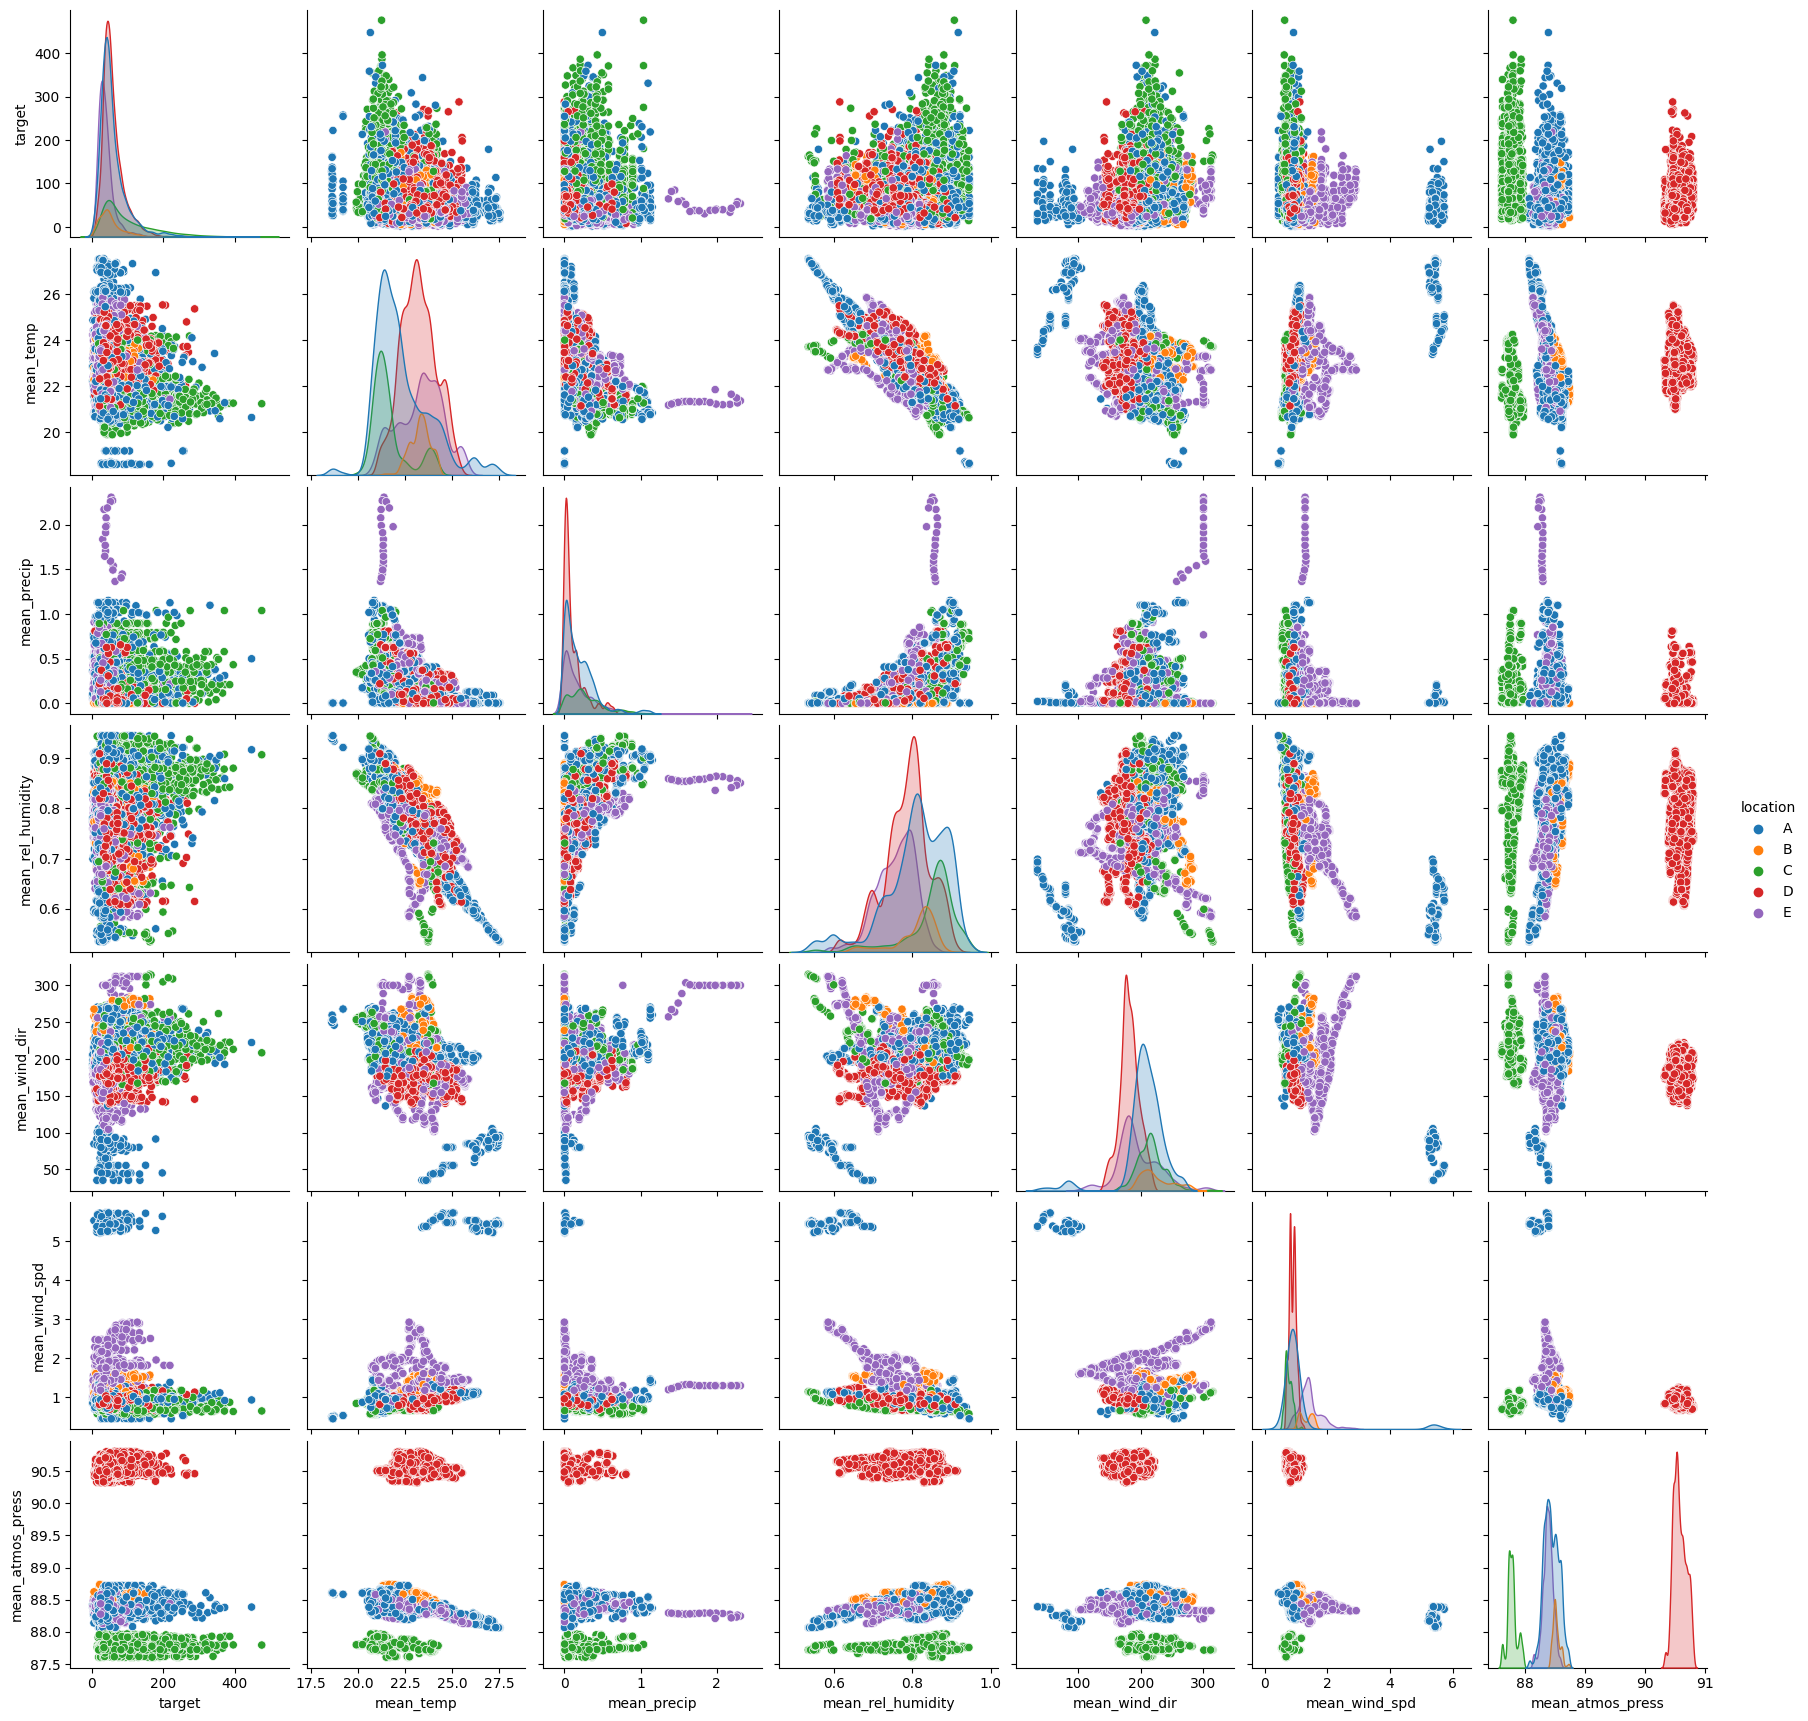

In [54]:
sns.pairplot(data=eda_mean,
              hue='location',
              hue_order=['A','B','C','D','E'])

In [64]:
for i in eda_mean.columns[1:]:
    print(i)
    print(eda_mean[['location',i]].groupby('location').describe())

target
          target                                                         \
           count       mean        std        min        25%        50%   
location                                                                  
A         5122.0  57.654407  40.153730   1.452619  33.945973  46.801340   
B          767.0  49.864973  31.257994   5.364419  27.946675  43.527442   
C         1753.0  97.772233  71.094473  14.514348  44.751304  72.774667   
D         4990.0  58.155597  30.230180   6.163191  38.458511  50.526938   
E         2907.0  37.800361  22.487640   2.150000  23.144689  32.986667   

                                  
                 75%         max  
location                          
A          68.479103  447.340000  
B          62.150756  171.252564  
C         130.600417  475.820000  
D          69.716117  287.689412  
E          45.665000  218.505385  
mean_temp
         mean_temp                                                        \
             count       m

<AxesSubplot:xlabel='location', ylabel='target'>

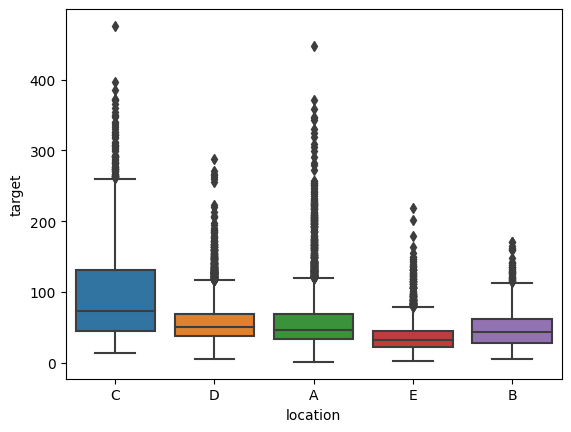

In [106]:
sns.boxplot(data=eda_mean, x='location', y='target', whis=1.5)#, order=['A','B','C','D','E'])

<AxesSubplot:>

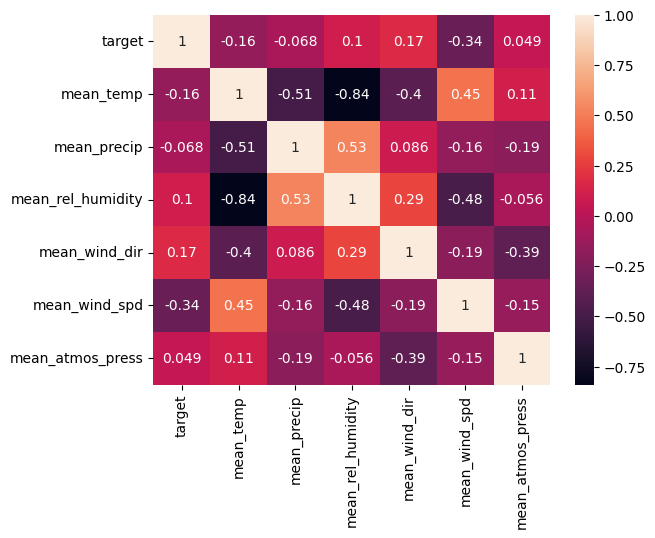

In [100]:
sns.heatmap(eda_mean.corr(method='spearman'), annot=True)

In [97]:
eda_mean.location.value_counts()

A    5122
D    4990
E    2907
C    1753
B     767
Name: location, dtype: int64

### --> We need to split the data by location or look at nested data!

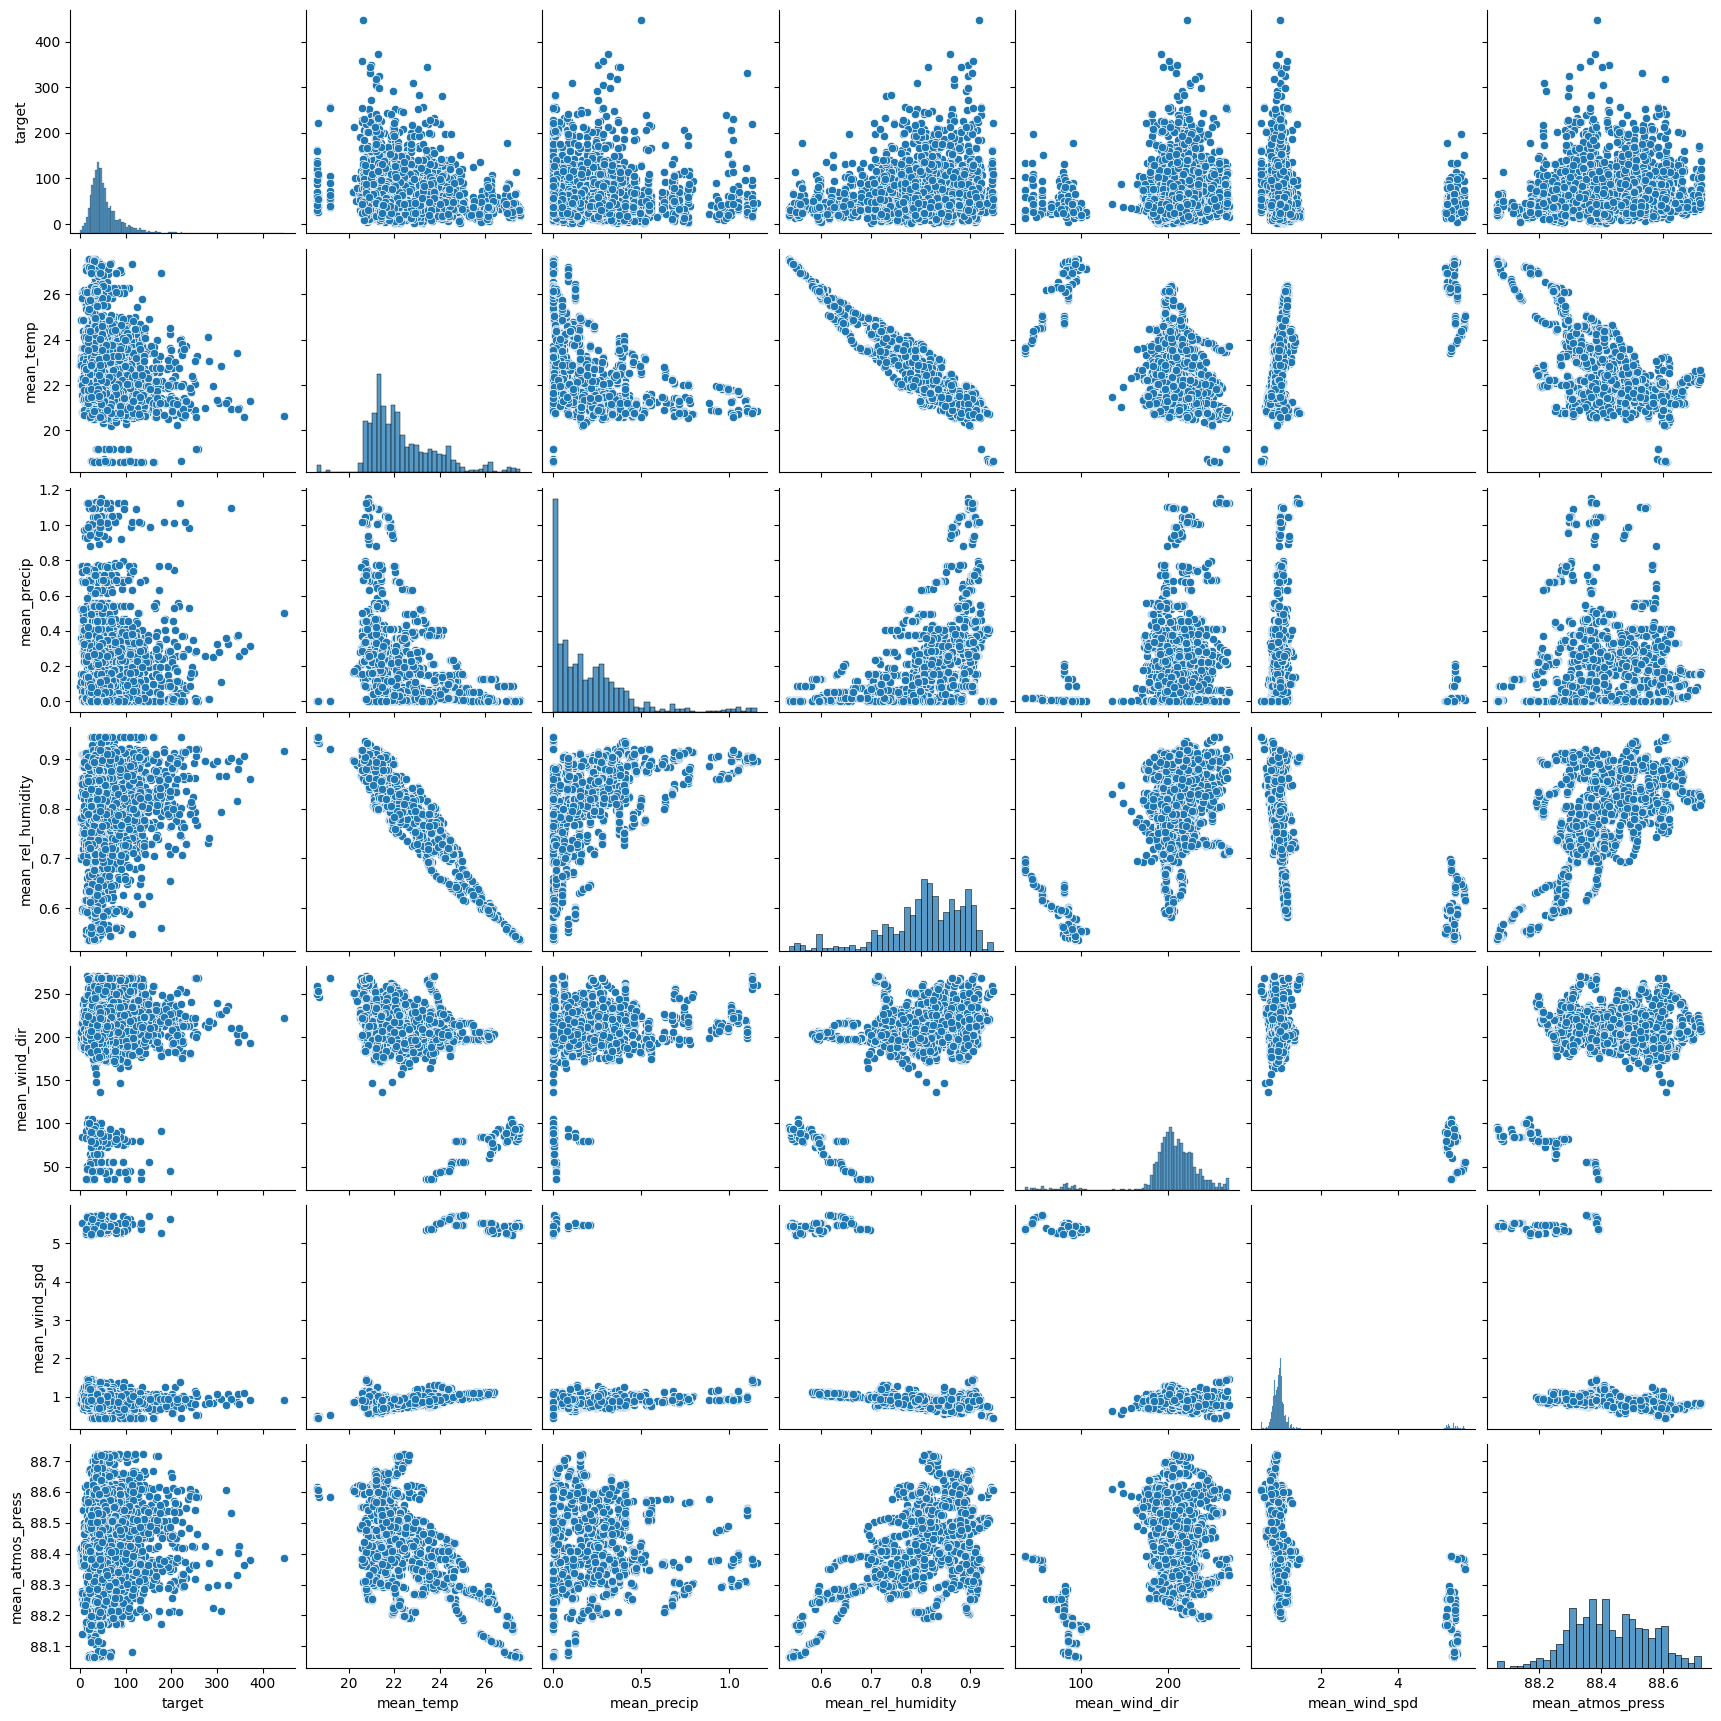

In [105]:
sns.pairplot(data=eda_mean.query('location=="A"'))

In [69]:
from sklearn.linear_model import LinearRegression

In [82]:
linreg = LinearRegression()
X = eda_mean[['mean_temp', 'mean_precip', 'mean_rel_humidity', 'mean_wind_dir', 'mean_wind_spd', 'mean_atmos_press']]
y = eda_mean[['target']]
linreg.fit(X, y)

LinearRegression()

In [84]:
intercept = linreg.intercept_
slope = linreg.coef_[0]
print("Model intercept:", intercept)
print("Coefficient for feature weight:", slope)

Model intercept: [359.2078036]
Coefficient for feature weight: [ -7.77496576 -11.96714957 -75.53720955   0.0862985   -6.06184391
  -0.8142947 ]


In [107]:
from sklearn.metrics import r2_score, mean_squared_error

In [108]:
# Calculate the estimated value for each data point
y_hat = linreg.predict(X)

# Calcualte the R-squared for our model
print("RMSE:", mean_squared_error(y, y_hat).round(3))
print("R-squared:", r2_score(y, y_hat).round(3))

RMSE: 1699.352
R-squared: 0.054


# More Stuff

In [19]:
test.head()

,ID,location,target,max_temp,min_temp,mean_temp,std_temp,var_temp,median_temp,ptp_temp,...,newrel_humidity119,newwind_dir119,windspeed119,atmospherepressure119,newtemp120,newprecip120,newrel_humidity120,newwind_dir120,windspeed120,atmospherepressure120
0,ID_test_0,C,NaN,26.858333,17.050000,21.389532,2.731833,7.462909,20.908333,9.808333,...,0.725250,167.412340,1.289167,87.580000,22.766667,0.000,NaN,163.667416,0.774167,87.625833
1,ID_test_1,C,NaN,26.991667,17.275000,21.302824,2.289268,5.240748,20.716667,9.716667,...,0.868917,174.138794,0.665833,87.920000,20.025000,0.000,0.886083,111.558812,0.311667,87.998333
2,ID_test_10,D,NaN,29.850000,17.108333,22.144421,2.943047,8.661528,21.458333,12.741667,...,0.892833,99.502531,2.285833,90.409167,20.608333,1.327,0.910167,68.393016,1.395000,90.464167
3,ID_test_100,C,NaN,27.325000,18.633333,22.361639,2.480003,6.150415,21.616667,8.691667,...,0.897583,329.644351,0.705833,87.844167,21.483333,0.000,0.861333,330.678241,1.026667,87.894167
4,ID_test_1000,D,NaN,31.091667,16.908333,23.560243,4.136978,17.114585,22.825000,14.183333,...,0.850000,12.645287,0.373333,90.561667,19.833333,0.000,0.851667,28.090116,0.325000,90.584167


#### Cross validation strategy (Kfold,or simple train test split )

In [20]:
Experiment_name="simple_model"

In [21]:
import os
os.makedirs("proc_data", exist_ok=True)
# os.makedirs("model_save/lgbm/{}".format(Experiment_name), exist_ok=True)
# os.makedirs("model_save/catboost/{}".format(Experiment_name), exist_ok=True)
# os.makedirs("model_save/xgboost/{}".format(Experiment_name), exist_ok=True)

In [22]:
try : 
    folds=pd.read_csv("./proc_data/folds_id.csv")
    train=train.merge(folds,on="ID",how="left")
    train.fold.nunique()
except : 
    #  you run this cell  only for the first time 
    from sklearn.model_selection import KFold 
    kfold=KFold(n_splits=5,shuffle=True,random_state=2020) # change this random_state or all of you will have the same score  :D 
    train.reset_index(drop=True,inplace=True)
    folds=train[["ID"]].copy()
    folds["fold"]=0
    for fold,(tr_indx,val_ind) in enumerate(kfold.split(folds)) : 
        folds.loc[val_ind,"fold"]=fold
    folds.to_csv("./proc_data/folds_id.csv",index=False)
    train=train.merge(folds,on="ID",how="left")
    
    del folds

### Model 

### Lgbm 

In [23]:
train.columns

Index(['ID', 'location', 'target', 'max_temp', 'min_temp', 'mean_temp',
       'std_temp', 'var_temp', 'median_temp', 'ptp_temp',
       ...
       'newwind_dir119', 'windspeed119', 'atmospherepressure119', 'newtemp120',
       'newprecip120', 'newrel_humidity120', 'newwind_dir120', 'windspeed120',
       'atmospherepressure120', 'fold'],
      dtype='object', length=772)

In [24]:
target_name="target"
id_name="ID"
features_to_remove=[target_name,id_name,"fold","location"]
features=train.columns.tolist()
features=[ fea for fea in  features if fea not in features_to_remove  ]


In [25]:
from sklearn.metrics import mean_squared_error
def metric(y,x):
    return np.sqrt(mean_squared_error(x,y))

In [26]:
import lightgbm as lgbm 
import xgboost as xgb 
import catboost as cat 

ModuleNotFoundError: No module named 'lightgbm'

In [ ]:
def train_function(model,train,test,params,other_params,target_name,features,metric):
    folds_num=train.fold.nunique()
    validation=train[[id_name,"fold",target_name]].copy()
    validation["pred_"+target_name]=0
    sub=test[[id_name]].copy()
    sub[target_name]=0
    for fold in np.sort(train.fold.unique()):
        print("#"*50+" {} ".format(fold)+"#"*50)
        os.makedirs("model_save/lgbm/{}/{}".format(Experiment_name,str(int(fold))), exist_ok=True)
        X_train=train[train.fold!=fold]
        X_val=train[train.fold==fold]
        
        train_pred,validation_pred,test_pred=model(X_train,X_val,test,params,other_params)
        
        validation.loc[validation.fold==fold,"pred_"+target_name]=validation_pred
        sub[target_name]+=test_pred/folds_num
        train_score=metric(X_train[target_name],train_pred)
        val_score=metric(X_val[target_name],validation_pred)
        print("train score : {} validation score : {}".format(round(train_score,4),round(val_score,4)))
    final_validation_score=metric(validation[target_name],validation["pred_"+target_name])
    print("final validation score : {}".format(final_validation_score))
        
    return sub,validation,final_validation_score

def lgbm_model(X_train,X_val,X_test,params,other_params):
    dtrain = lgbm.Dataset(data=X_train[features], label=X_train[target_name], feature_name=features)
    dval = lgbm.Dataset(data=X_val[features], label=X_val[target_name], feature_name=features)

    model = lgbm.train(
        params=params,
        train_set=dtrain,
        num_boost_round=other_params["num_boost_round"],
        valid_sets=(dtrain, dval),
        early_stopping_rounds=other_params["early_stopping_rounds"],
        verbose_eval=other_params["verbose_eval"],
    )        
    best_iteration = model.best_iteration
    train_pred=model.predict(X_train[features], num_iteration=best_iteration)
    validation_pred=model.predict(X_val[features], num_iteration=best_iteration)
    test_pred=model.predict(test[features], num_iteration=best_iteration)
        
    return train_pred,validation_pred,test_pred

In [ ]:
other_params={"num_boost_round":50000000,
              "early_stopping_rounds":50,
              "verbose_eval":1000,
}
lgbm_params = {
    "bagging_fraction": 0.8,
    "bagging_freq": 2,
    "boosting_type": "gbdt",
    "feature_fraction": 0.8,
    "learning_rate": 0.01,
    "max_depth": 8,
    "num_threads": 16,
    "objective": "regression",
    "metric": "rmse",
    "seed": 2020,
}

In [ ]:
sub,validation,score=train_function(model=lgbm_model,
                                    train=train,
                                    test=test,
                                    params=lgbm_params,
                                    other_params=other_params,
                                    target_name=target_name,
                                    features=features,
                                    metric=metric)

In [ ]:
os.makedirs("subs", exist_ok=True)

In [ ]:
sub.to_csv("./subs/lgbm_{}.csv".format(round(score,2)),index=False)